In [3]:
!pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s  0:00:00


In [5]:
# ==============================
# IMPORT LIBRARIES
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib

from faker import Faker

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer


# ==============================
# INITIALIZE OBJECTS
# ==============================

fake = Faker()
sia = SentimentIntensityAnalyzer()


# ==============================
# GENERATE FAKE DATASET
# ==============================

def generate_fake_reviews(n=500):
    
    positive_words = [
        "great", "amazing", "excellent", "fantastic", "love",
        "wonderful", "perfect", "awesome", "best", "beautiful"
    ]
    
    negative_words = [
        "bad", "terrible", "awful", "worst", "hate",
        "horrible", "poor", "disappointing", "ugly", "broken"
    ]
    
    reviews = []
    
    for _ in range(n):
        
        if random.random() > 0.5:
            sentiment = "positive"
            word = random.choice(positive_words)
        else:
            sentiment = "negative"
            word = random.choice(negative_words)
        
        review = f"This product is {word}. {fake.sentence()}"
        
        reviews.append({
            "review": review,
            "true_sentiment": sentiment
        })
    
    return pd.DataFrame(reviews)


df = generate_fake_reviews(500)

print(df.head())


# ==============================
# ADD VADER SENTIMENT SCORES
# ==============================

df['compound_score'] = df['review'].apply(
    lambda text: sia.polarity_scores(text)['compound']
)

df['predicted_sentiment'] = df['compound_score'].apply(
    lambda score: "positive" if score >= 0 else "negative"
)


# ==============================
# CONVERT TEXT TO TF-IDF FEATURES
# ==============================

vectorizer = TfidfVectorizer(max_features=1000)

X = vectorizer.fit_transform(df['review'])

y = df['predicted_sentiment']


# ==============================
# TRAIN TEST SPLIT
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# TRAIN RANDOM FOREST MODEL
# ==============================

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


# ==============================
# MAKE PREDICTIONS
# ==============================

y_pred = model.predict(X_test)


# ==============================
# EVALUATE MODEL
# ==============================

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


# ==============================
# SAVE MODEL AND VECTORIZER
# ==============================

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("\nModel and vectorizer saved successfully.")


# ==============================
# LOAD MODEL EXAMPLE
# ==============================

loaded_model = joblib.load("sentiment_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")


# ==============================
# TEST WITH NEW TEXT
# ==============================

new_text = ["This product is amazing and fantastic"]

new_text_vectorized = loaded_vectorizer.transform(new_text)

prediction = loaded_model.predict(new_text_vectorized)

print("\nNew text prediction:", prediction[0])


                                              review true_sentiment
0        This product is worst. Green so wish sound.       negative
1  This product is love. Mean couple expect trial...       positive
2       This product is great. Knowledge parent pay.       positive
3  This product is horrible. Turn bar data three ...       negative
4  This product is fantastic. Positive fish yard ...       positive

Accuracy: 0.99

Classification Report:

              precision    recall  f1-score   support

    negative       0.98      1.00      0.99        46
    positive       1.00      0.98      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Model and vectorizer saved successfully.

New text prediction: positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adnanaltimeemy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Number of records
n = 5000

companies = ["Costcutter", "Musgrave"]

locations = ["London", "Manchester", "Birmingham", "Liverpool", "Dublin"]

genders = ["Male", "Female"]

positive_reviews = [
    "Great prices and excellent service",
    "Very satisfied with quality",
    "Friendly staff and fast checkout",
    "Excellent product selection",
    "Very clean and organized store"
]

negative_reviews = [
    "Too expensive",
    "Poor customer service",
    "Limited product availability",
    "Long waiting time",
    "Bad shopping experience"
]

data = []

for i in range(n):

    company = random.choice(companies)

    # Musgrave generally higher sales
    if company == "Musgrave":
        sales = np.random.normal(120000, 25000)
        profit_margin = np.random.normal(0.18, 0.04)
    else:
        sales = np.random.normal(50000, 15000)
        profit_margin = np.random.normal(0.12, 0.03)

    age = random.randint(18, 75)
    income = np.random.normal(35000, 12000)
    gender = random.choice(genders)
    location = random.choice(locations)

    review = random.choice(
        positive_reviews if random.random() > 0.4 else negative_reviews
    )

    data.append([
        company,
        sales,
        profit_margin,
        age,
        income,
        gender,
        location,
        review
    ])

df = pd.DataFrame(data, columns=[
    "Company",
    "Sales",
    "ProfitMargin",
    "Age",
    "Income",
    "Gender",
    "Location",
    "Review"
])

df.head()


,Company,Sales,ProfitMargin,Age,Income,Gender,Location,Review
0,Costcutter,46153.000365,0.104454,75,25605.767377,Female,Manchester,Bad shopping experience
1,Costcutter,59700.192947,0.127401,68,25375.560027,Male,Manchester,Limited product availability
2,Costcutter,64324.972609,0.181466,59,33848.566077,Female,London,Excellent product selection
3,Costcutter,38087.533275,0.153379,25,18439.188664,Female,Dublin,Bad shopping experience
4,Costcutter,45199.986969,0.156398,52,37739.604895,Male,Liverpool,Very clean and organized store


In [7]:
df.to_csv("costcutter_musgrave_retail_dataset.csv", index=False)


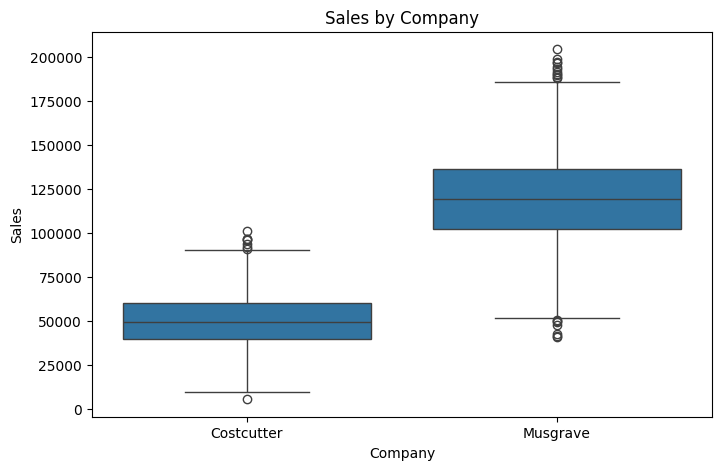

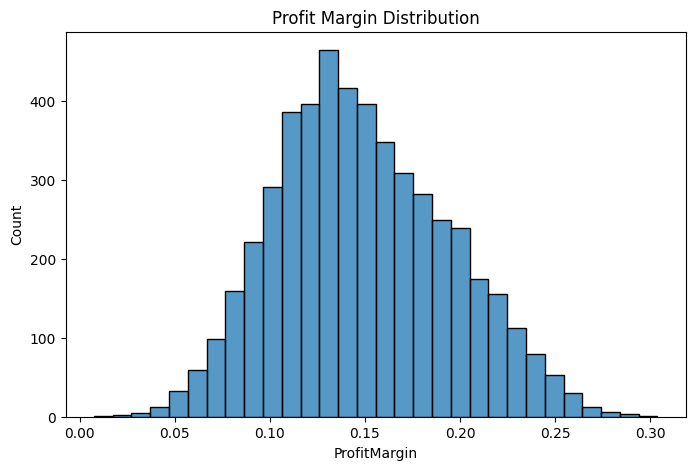

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Company", y="Sales", data=df)
plt.title("Sales by Company")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df["ProfitMargin"], bins=30)
plt.title("Profit Margin Distribution")
plt.show()


In [9]:
df_encoded = pd.get_dummies(df, columns=["Company", "Gender", "Location"], drop_first=True)

df_encoded.head()


,Sales,ProfitMargin,Age,Income,Review,Company_Musgrave,Gender_Male,Location_Dublin,Location_Liverpool,Location_London,Location_Manchester
0,46153.000365,0.104454,75,25605.767377,Bad shopping experience,False,False,False,False,False,True
1,59700.192947,0.127401,68,25375.560027,Limited product availability,False,True,False,False,False,True
2,64324.972609,0.181466,59,33848.566077,Excellent product selection,False,False,False,False,True,False
3,38087.533275,0.153379,25,18439.188664,Bad shopping experience,False,False,True,False,False,False
4,45199.986969,0.156398,52,37739.604895,Very clean and organized store,False,True,False,True,False,False


In [10]:
X = df_encoded.drop(["ProfitMargin", "Review"], axis=1)

y = df_encoded["ProfitMargin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [12]:
y_pred = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.42409300323689414
RMSE: 0.03403157834210099


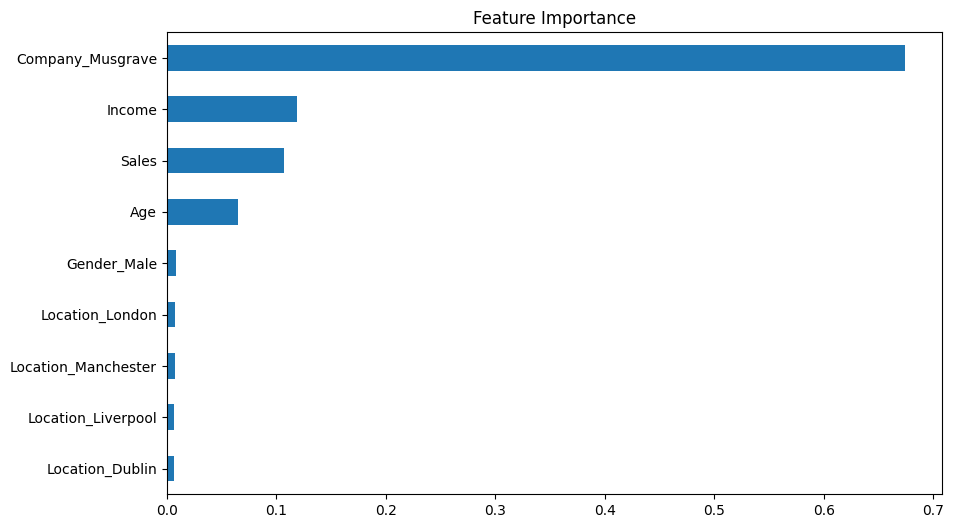

In [13]:
importance = pd.Series(rf.feature_importances_, index=X.columns)

importance.sort_values().plot(kind="barh", figsize=(10,6))

plt.title("Feature Importance")

plt.show()


In [14]:
sia = SentimentIntensityAnalyzer()

df["SentimentScore"] = df["Review"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

df["SentimentLabel"] = df["SentimentScore"].apply(
    lambda x: "Positive" if x > 0 else "Negative"
)

df.head()


,Company,Sales,ProfitMargin,Age,Income,Gender,Location,Review,SentimentScore,SentimentLabel
0,Costcutter,46153.000365,0.104454,75,25605.767377,Female,Manchester,Bad shopping experience,-0.5423,Negative
1,Costcutter,59700.192947,0.127401,68,25375.560027,Male,Manchester,Limited product availability,-0.2263,Negative
2,Costcutter,64324.972609,0.181466,59,33848.566077,Female,London,Excellent product selection,0.5719,Positive
3,Costcutter,38087.533275,0.153379,25,18439.188664,Female,Dublin,Bad shopping experience,-0.5423,Negative
4,Costcutter,45199.986969,0.156398,52,37739.604895,Male,Liverpool,Very clean and organized store,0.4576,Positive


In [15]:
vectorizer = TfidfVectorizer()

X_text = vectorizer.fit_transform(df["Review"])

y_text = df["SentimentLabel"]


In [16]:
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42
)

rf_nlp = RandomForestClassifier(n_estimators=200)

rf_nlp.fit(X_train_text, y_train_text)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [17]:
y_pred_text = rf_nlp.predict(X_test_text)

print(classification_report(y_test_text, y_pred_text))


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       445
    Positive       1.00      1.00      1.00       555

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [18]:
joblib.dump(rf, "profit_margin_model.pkl")

joblib.dump(rf_nlp, "sentiment_model.pkl")


['sentiment_model.pkl']